In [16]:
%matplotlib ipympl
import json
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# JSON files -> lists of dictionaries
with open('./ui_all_q_p.json') as json_file:
    ui_all_q_p = json.load(json_file)
    
with open('./ui_all_q.json') as json_file:
    ui_all_q = json.load(json_file)

In [17]:
# [{}] -> [[]] 

ui_data = []

for d in ui_all_q_p:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        ui_data.append(['ui_all_q_p', name,f1_mean, roc_mean, precision_mean, recall_mean])

for d in ui_all_q:   
    for x,y in d.items() :
        name = x
        f1_mean = y['f1_mean']
        roc_mean = y['roc_mean']
        precision_mean = y['precision_mean']
        recall_mean = y['recall_mean']
        ui_data.append(['ui_all_q', name,f1_mean, roc_mean, precision_mean, recall_mean])

In [18]:
# [[]] -> dataframe
df_ui_data = pd.DataFrame(ui_data, columns=['QuestionSet', 'Model', 'f1', 'roc_auc', 'precision', 'recall'])

In [19]:
df_ui_data['precision'].describe()

count    126.000000
mean       0.151988
std        0.093301
min        0.000000
25%        0.100000
50%        0.147436
75%        0.219846
max        0.383983
Name: precision, dtype: float64

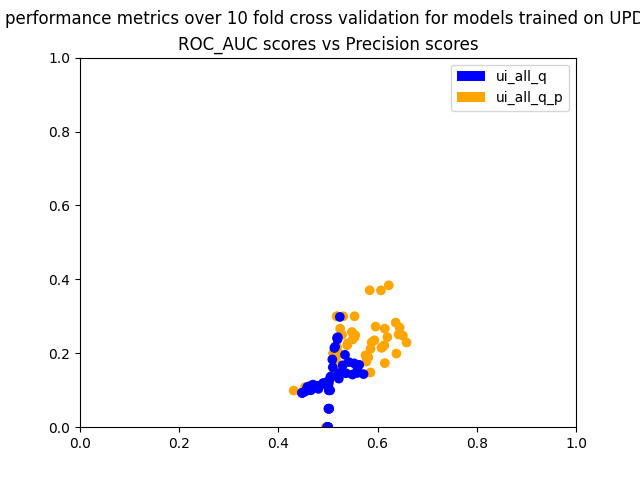

In [22]:
# UPDRS I plot

colors = {'ui_all_q':'blue', 'ui_all_q_p':'orange'}

fig = plt.figure()
ax = fig.add_subplot(111)
# ax2 = fig.add_subplot(122)

# plot 1
ax.set_title("ROC_AUC scores vs Precision scores")
ax.scatter(df_ui_data['roc_auc'], df_ui_data['precision'], c=df_ui_data['QuestionSet'].map(colors), label=['ui_all_q','ui_all_q_p'])
ax.set_xlim([0,1])
ax.set_ylim([0,1])

classes = ['ui_all_q','ui_all_q_p']
class_colours = ['blue','orange']
recs = []
for i in range(0,len(class_colours)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
ax.legend(recs,classes,loc=1)

# plot 2
# ax2.set_title("Precision scores vs Recall scores")
# ax2.scatter(df_ui_data['precision'], df_ui_data['recall'], c=df_ui_data['QuestionSet'].map(colors))
# ax2.set_xlim([0,1])
# ax2.set_ylim([0,1])



plt.suptitle("Averaged performance metrics over 10 fold cross validation for models trained on UPDRS I data")
plt.show()

In [23]:
# df_ui_data.query("roc_auc > 0.6 and precision > 0.2")
x = df_ui_data.sort_values('precision', ascending=False)
x.head(n=20)
# General Observations for UPDRS I:
# Nothing worth getting excited about
# + PREV_SIGFALL out performs w/o


,QuestionSet,Model,f1,roc_auc,precision,recall
11,ui_all_q_p,LDA3,0.337939,0.622582,0.383983,0.322222
25,ui_all_q_p,SVM2,0.274297,0.584040,0.370516,0.238889
14,ui_all_q_p,LDA9,0.311403,0.606808,0.370198,0.287500
46,ui_all_q_p,ADA1,0.186582,0.553559,0.300238,0.154167
39,ui_all_q_p,RF2,0.080000,0.518899,0.300000,0.047222
31,ui_all_q_p,SVM8,0.062222,0.517361,0.300000,0.034722
44,ui_all_q_p,RF7,0.110909,0.530680,0.300000,0.070833
110,ui_all_q,ADA2,0.133653,0.523834,0.298333,0.091667
7,ui_all_q_p,GNB8,0.334415,0.636533,0.283093,0.420833
23,ui_all_q_p,QDA9,0.273943,0.595945,0.272219,0.286111
